In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
def generate_random(seed, coefficients, range_start, range_end):
    """
    Parameters:
        seed (int): The initial seed value.
        coefficients (list): Coefficients of the linear recurrence relation.
        range_start (int): Start of the desired range (inclusive).
        range_end (int): End of the desired range (inclusive).

    Returns:
        int: Generated random number within the specified range.
    """
    current_value = seed

    new_value = sum(coeff * current_value for coeff in coefficients)
    new_value = (new_value % (range_end - range_start + 1)) + range_start

    return int(new_value)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string

In [4]:
# Q1
df = pd.read_csv('/content/drive/MyDrive/A1_data/TEXT_DATA/TEXT_DATA/Hindi_English_parallel.csv')
df = df.dropna() # dropping nans
sum_eng = 0
sum_hindi = 0
# iterate over the dataframe rows and print the first few rows of the text column
for index, row in df.iterrows():
    # if (index == 37554):
    #     print((row['english_sentence']), row['hindi_sentence'])
    # print datatype of row['english_sentence']
    # print(len(row['english_sentence']), index)
    # print(len(row['english_sentence'])	)
    sum_eng += len(row['english_sentence'])
    sum_hindi += len(row['hindi_sentence'])


# find number of rows in the dataframe
num_rows = df.shape[0]
# print(num_rows)
avg_eng = sum_eng / num_rows
avg_hindi = sum_hindi / num_rows
print("Average length of english sentence: ", avg_eng)
print("Average length of hindi sentence: ", avg_hindi)

Average length of english sentence:  89.60715974865431
Average length of hindi sentence:  86.28136190626337


In [5]:
df.head()

,Unnamed: 0,english_sentence,hindi_sentence
0,0,politicians do not have permission to do what ...,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर..."
1,1,"I'd like to tell you about one such child,",मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...
2,2,This percentage is even greater than the perce...,यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।
3,3,what we really mean is that they're bad at not...,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
4,4,.The ending portion of these Vedas is called U...,इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।


#### Q2: remove punctuations and special characters from the text, the unpunctuated sentences are stored in a new column in the rand_20_rows dataframe

In [6]:
# add whatever extra punctuations you need to remove
rand_20_rows = df.sample(n = 20, random_state = 42)
# iterate over the dataframe rows and print the first few rows of the text column
# after removing punctuation add the new string to a new column in the dataframe
for index, row in rand_20_rows.iterrows():
    # print(row['english_sentence'])
    # print(row['hindi_sentence'])
    # remove punctuation from the text column
    row['nop_english_sentence'] = row['english_sentence'].translate(str.maketrans('', '', string.punctuation + '“”'))
    row['nop_hindi_sentence'] = row['hindi_sentence'].translate(str.maketrans('', '', string.punctuation + '“”'+ '।'))
    # add the new column to the dataframe
    rand_20_rows.loc[index, 'nop_english_sentence'] = row['nop_english_sentence']
    rand_20_rows.loc[index, 'nop_hindi_sentence'] = row['nop_hindi_sentence']
    # print(row['nop_english_sentence'])
    # print(row['nop_hindi_sentence'])
    # if (index == 5):
    #     break



In [7]:
rand_20_rows.head()

,Unnamed: 0,english_sentence,hindi_sentence,nop_english_sentence,nop_hindi_sentence
12290,12290,The wall above forms the bahya bhitti or outer...,"ऊपर की दीवार , संरचना के पिछले या पशऋ-ऊण्श्छ्ष...",The wall above forms the bahya bhitti or outer...,ऊपर की दीवार संरचना के पिछले या पशऋऊण्श्छ्ष्च...
156269,28662,If you want to ascent the climb of Gun Hill th...,यदि आप गनहिल की चढ़ाई चढ़ना चाहें तो माल रोड स्थ...,If you want to ascent the climb of Gun Hill th...,यदि आप गनहिल की चढ़ाई चढ़ना चाहें तो माल रोड स्थ...
47519,47519,“When I have finished the formation of Adam fr...,"जब मैंने मिट्टी से आदम का निर्माण पूरा कर लिया,",When I have finished the formation of Adam fro...,जब मैंने मिट्टी से आदम का निर्माण पूरा कर लिया
97136,97136,And so here was this lesson again - leadership...,और फिर यहाँ पर एक और शिक्षा थी कि - नेतृत्व मह...,And so here was this lesson again leadership ...,और फिर यहाँ पर एक और शिक्षा थी कि नेतृत्व महत...
102391,102391,but using triangles.,लेकिन त्रिकोण को उपयोग करके |,but using triangles,लेकिन त्रिकोण को उपयोग करके


#### Q4: find frequency of words in each language, sort dictionary according to frequency

In [8]:
rand_50_rows = df.sample(n = 50, random_state = 42)
eng_freq = {}
hindi_freq = {}
# make a dictionary of all the words in the english sentences, with the word as the key and a unique number as the value
for index, row in df.iterrows():
    for norm_word in row['english_sentence'].translate(str.maketrans('', '', string.punctuation + '“”')).split():
        word = norm_word.lower()
        if word in eng_freq:
            eng_freq[word] += 1
        else:
            eng_freq[word] = 1
    for norm_word in row['hindi_sentence'].translate(str.maketrans('', '', string.punctuation + '“”'+ '।')).split():
        word = norm_word.lower()
        if word in hindi_freq:
            hindi_freq[word] += 1
        else:
            hindi_freq[word] = 1
# sort the dictionary in ascending order of the alphabet
# eng_freq = dict(sorted(eng_freq.items(), key=lambda item: item[0]))
# sort the dictionary in descending order of the frequency
eng_freq = dict(sorted(eng_freq.items(), key=lambda item: item[1], reverse=True))
hindi_freq = dict(sorted(hindi_freq.items(), key=lambda item: item[1], reverse=True))

In [9]:
print(eng_freq)
print(hindi_freq)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#### Q3: a dictionary with word: unique value pairs is created from 50 random sentences

In [10]:
eng_dict = {}
hindi_dict = {}
for index, row in rand_50_rows.iterrows():
    for word in row['english_sentence'].translate(str.maketrans('', '', string.punctuation + '“”')).split():
        if word in eng_dict:
            pass
        else:
            eng_dict[word] = None
    for word in row['hindi_sentence'].translate(str.maketrans('', '', string.punctuation + '“”'+ '।')).split():
        if word in hindi_dict:
            pass
        else:
            hindi_dict[word] = None
eng_count = 0
hindi_count = 0
for key in eng_dict:
    eng_dict[key] = eng_count
    eng_count += 1
for key in hindi_dict:
    hindi_dict[key] = hindi_count
    hindi_count += 1

# eng_dict = dict(sorted(eng_dict.items(), key=lambda item: item[0]))

In [11]:
print(eng_dict)
print(hindi_dict)

{'The': 0, 'wall': 1, 'above': 2, 'forms': 3, 'the': 4, 'bahya': 5, 'bhitti': 6, 'or': 7, 'outer': 8, 'of': 9, 'rear': 10, 'western': 11, 'part': 12, 'structure': 13, 'surrounding': 14, 'inner': 15, 'antara': 16, 'that': 17, 'contains': 18, 'garbha': 19, 'sanctum': 20, 'thus': 21, 'rendering': 22, 'vimana': 23, 'a': 24, 'sandhara': 25, 'one': 26, 'while': 27, 'over': 28, 'eastern': 29, 'it': 30, 'external': 31, 'enclosing': 32, 'twelvepillard': 33, 'rangamandapa': 34, 'inside': 35, 'If': 36, 'you': 37, 'want': 38, 'to': 39, 'ascent': 40, 'climb': 41, 'Gun': 42, 'Hill': 43, 'then': 44, 'there': 45, 'is': 46, 'road': 47, 'from': 48, 'Mall': 49, 'Road': 50, 'situated': 51, 'courthouse': 52, 'When': 53, 'I': 54, 'have': 55, 'finished': 56, 'formation': 57, 'Adam': 58, 'clay': 59, 'And': 60, 'so': 61, 'here': 62, 'was': 63, 'this': 64, 'lesson': 65, 'again': 66, 'leadership': 67, 'matters': 68, 'but': 69, 'using': 70, 'triangles': 71, 'Chola': 72, 'layer': 73, 'has': 74, 'been': 75, 'expose

#### continuation of Q4: plot the 10 highest frequency words in each language on a histogram

In [12]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/A1_data/TEXT_DATA/Noto_Sans.zip", "r") as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/A1_data/TEXT_DATA/Noto_Sans")

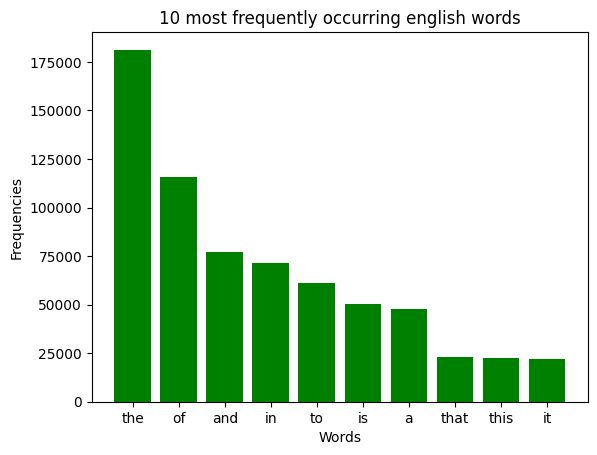

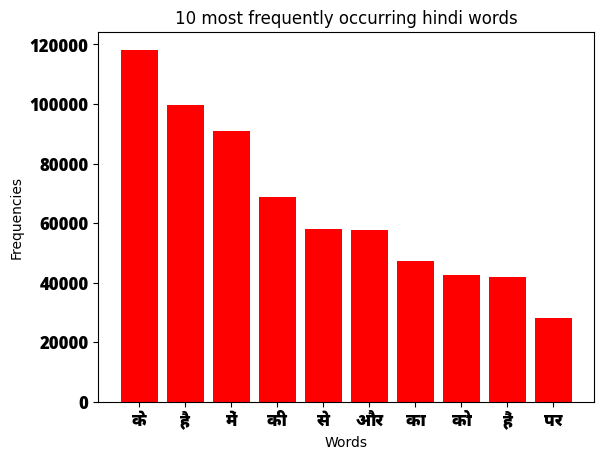

In [14]:
from matplotlib.font_manager import FontProperties
hindi_font = FontProperties(fname="/content/drive/MyDrive/A1_data/TEXT_DATA/Noto_Sans/NotoSans-Black.ttf", size=12)
# plot a histogram of the frequency of the words in the english sentences
plt.bar(list(eng_freq.keys())[:10], list(eng_freq.values())[:10], color='g')
plt.title('10 most frequently occurring english words')
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.show()
# plot a histogram of the frequency of the words in the hindi sentences --> how to display hindi characters?
plt.bar(list(hindi_freq.keys())[:10], list(hindi_freq.values())[:10], color='r')
plt.title('10 most frequently occurring hindi words')
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.xticks(fontproperties=hindi_font)
plt.yticks(fontproperties=hindi_font)
plt.show()

#### sample used to plot hindi words on graph

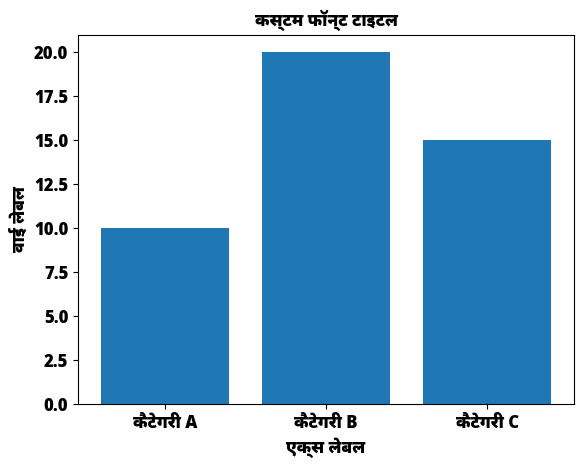

In [15]:
# Define the Noto Sans font with the desired size
font_noto_sans = FontProperties(fname="/content/drive/MyDrive/A1_data/TEXT_DATA/Noto_Sans/NotoSans-Black.ttf", size=12)

# Data for the bar plot
categories = ['कैटेगरी A', 'कैटेगरी B', 'कैटेगरी C']
values = [10, 20, 15]

# Create a bar plot
plt.bar(categories, values)

# Set title and labels with Noto Sans font
plt.title('कस्टम फॉन्ट टाइटल', fontproperties=font_noto_sans)
plt.xlabel('एक्स लेबल', fontproperties=font_noto_sans)
plt.ylabel('वाई लेबल', fontproperties=font_noto_sans)

# Set Noto Sans font for tick labels
plt.xticks(fontproperties=font_noto_sans)
plt.yticks(fontproperties=font_noto_sans)

# Display the plot
plt.show()
